In [293]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import calendar
import plotly.express as px
import wordcloud
from wordcloud import WordCloud
from PIL import Image
warnings.filterwarnings("ignore", category=FutureWarning)

In [294]:
def ler_json(arq):
    with open(arq, 'r', encoding='utf8') as f:
        return json.load(f)
data1 = ler_json('../data/raw/lupa.json')

In [295]:
data2 = ler_json('../data/raw/arquivo1.json')

In [296]:
data3 = ler_json('../data/raw/g1scrapy-true.json')

In [297]:
data4 = ler_json('../data/raw/g1scrapy.json')

In [298]:
colunas = ['title', 'title_format', 'vinheta', 'data', 'dia',  'mes', 'ano', 'body', 'label']

In [299]:
dados1 = pd.DataFrame.from_dict(data1)
df1 = pd.DataFrame(columns=colunas)
df1 = df1.append(dados1)
df1.head(2)

,title,title_format,vinheta,data,dia,mes,ano,body,label
0,#Verificamos: É falso que Tite prestou homenag...,NaN,No Facebook,16.11.2021 |,NaN,NaN,NaN,"Apesar da semelhança física, foto que circula ...",1
1,#Verificamos: É falso que esposa do CEO da Pfi...,NaN,No WhatsApp,16.11.2021 |,NaN,NaN,NaN,Myriam Bourla esteve em evento em 10 de novemb...,1


In [300]:
df1.isna().sum()

title              0
title_format    3310
vinheta            0
data               0
dia             3310
mes             3310
ano             3310
body               1
label              0
dtype: int64

In [301]:
for i in range(len(df1)):
    df1['title_format'][i] = str(df1['title'][i]).replace('#Verificamos:','')
    df1['title'][i] = str(df1['title_format'][i]).replace('falso','')
    df1['data'][i] = str(df1['data'][i])[:11]
    df1['data'][i] = df1['data'][i].replace('.','-')
    df1['dia'][i] = int(df1['data'][i][0:2])
    df1['mes'][i] = calendar.month_name[int(df1['data'][i][3:5])]
    df1['ano'][i] = int(df1['data'][i][6:])

In [302]:
(df1['label'] == 1).sum()

2044

In [303]:
dados2 = pd.DataFrame.from_dict(data2)
df2 = pd.DataFrame(columns=colunas)
df2 = df2.append(dados2)
df2.head(2)

,title,title_format,vinheta,data,dia,mes,ano,body,label
0,A pressão internacional por preservação que am...,NaN,NaN,24 novembro 2021,NaN,NaN,NaN,"Europa, EUA e China discutem mudanças em regra...",0
1,Brasil corre risco de nova onda de covid como ...,NaN,NaN,24 novembro 2021,NaN,NaN,NaN,Especialistas apontam preocupações para os pró...,0


In [304]:
df2.shape

(956, 9)

In [305]:
def get_data(data):
    if ':' not in data:
        return data
    else:
        return str(data)[str(data).index(':')+4:]
    

In [306]:
def translate(mes):
    if mes == 'janeiro':
        return 'January'
    if mes == 'fevereiro':
        return 'Febuary'
    if mes == 'março':
        return 'March'
    if mes == 'abril':
        return 'April'
    if mes == 'junho':
        return 'June'
    if mes == 'julho':
        return 'July'
    if mes == 'agosto':
        return 'August'
    if mes == 'setembro':
        return 'September'
    if mes == 'outubro':
        return 'October'
    if mes == 'novembro':
        return 'November'
    if mes == 'dezembro':
        return 'December'  

In [307]:
for i in range(len(df2)):
    
    df2['data'][i] = get_data(df2['data'][i])
    #dados2['data'][i] = dados2['data'][i].replace('.','-')
    df2['dia'][i] = str(df2['data'][i]).split(' ')[0]
    df2['mes'][i] = translate(str(df2['data'][i]).split(' ')[1])
    df2['ano'][i] = str(df2['data'][i]).split(' ')[2]

df2

,title,title_format,vinheta,data,dia,mes,ano,body,label
0,A pressão internacional por preservação que am...,NaN,NaN,24 novembro 2021,24,November,2021,"Europa, EUA e China discutem mudanças em regra...",0
1,Brasil corre risco de nova onda de covid como ...,NaN,NaN,24 novembro 2021,24,November,2021,Especialistas apontam preocupações para os pró...,0
2,Como montadoras pressionam governo a adiar nor...,NaN,NaN,24 novembro 2021,24,November,2021,Regras para fabricar veículos mais limpos estã...,0
3,Covid-19: Brasil registra 273 óbitos da doença...,NaN,NaN,24 novembro 2021,24,November,2021,Confira os dados atualizados sobre a pandemia ...,0
4,'É possível ser cientista e mãe': grupo brasil...,NaN,NaN,24 novembro 2021,24,November,2021,"Com cinco anos de existência, a iniciativa con...",0
...,...,...,...,...,...,...,...,...,...
992,Derrotas de aliados mostram que ‘Bolsonaro não...,NaN,NaN,30 novembro 2020,30,November,2020,"Em entrevista à BBC News Brasil, o analista Sé...",0
993,Veja os resultados do 2º turno das eleições pa...,NaN,NaN,29 novembro 2020,29,November,2020,Mapas interativos da BBC mostram contagem em n...,0
994,Segundo turno de 2020 pode ser 'embrião' de fr...,NaN,NaN,28 novembro 2020,28,November,2020,"Dirigentes de PT, PSOL, PC do B e PDT acham qu...",0
995,Desigualdade de salários vai a novo recorde no...,NaN,NaN,27 novembro 2020,27,November,2020,Recuperação da renda dos trabalhadores com car...,0


In [308]:
dados3 = pd.DataFrame.from_dict(data3)
df3 = pd.DataFrame(columns=colunas)
df3 = df3.append(dados3)
df3

,title,title_format,vinheta,data,dia,mes,ano,body,label,lide
0,Ministério da Saúde confirma 11 casos da varia...,NaN,Saúde,Há 20 minutos,NaN,NaN,NaN,NaN,0,None
1,17 estados não divulgam vacinação; 9 estados e...,NaN,Vacinas,Há 2 horas,NaN,NaN,NaN,NaN,0,None
2,Governo diz que recuperou dados sobre vacinaçã...,NaN,Saúde,Há 10 horas,NaN,NaN,NaN,NaN,0,None
3,Mãe e filha morrem soterradas na Bahia; nº de ...,NaN,Bahia,Há 3 horas,NaN,NaN,NaN,NaN,0,None
4,"'Deixa tudo aí, a vida é o mais importante': o...",NaN,Bahia,Há 2 horas,NaN,NaN,NaN,NaN,0,None
...,...,...,...,...,...,...,...,...,...,...
3335,Os desempregados 'desesperados para ter algo n...,NaN,Trabalho e Carreira,Há 1 mês,NaN,NaN,NaN,NaN,0,None
3336,"Bar das Patroas em SP, inspirado no projeto de...",NaN,São Paulo,Há 1 mês,NaN,NaN,NaN,NaN,0,None
3337,Polícia investiga morte de homem que seria mot...,NaN,Rio de Janeiro,Há 1 mês,NaN,NaN,NaN,NaN,0,None
3338,VÍDEOS: últimos momentos de Marília Mendonça,NaN,Pop & Arte,Há 1 mês,NaN,NaN,NaN,NaN,0,None


In [309]:
(df3['label'] == 0).sum()

3304

In [310]:
dados4 = pd.DataFrame.from_dict(data4)
df4 = pd.DataFrame(columns=colunas)
df4 = df4.append(dados4)
df4

,title,title_format,vinheta,data,dia,mes,ano,body,label,lide
0,Fato ou Fake: últimos vídeos,NaN,Fato ou Fake,Há 3 semanas,NaN,NaN,NaN,NaN,0,None
1,É #FAKE que imagens de autópsia mostrem lesões...,NaN,CoronaVírus,Há 3 dias,NaN,NaN,NaN,NaN,1,None
2,Veja o processo de apuração da FAKE envolvendo...,NaN,G1 Fato ou Fake,Há 3 dias,NaN,NaN,NaN,NaN,0,None
3,É FAKE que vídeo mostre Bell Marques falando d...,NaN,G1 Fato ou Fake,Há 3 dias,NaN,NaN,NaN,NaN,0,None
4,É #FAKE que enfermeira de hospital esloveno re...,NaN,CoronaVírus,Há 4 dias,NaN,NaN,NaN,NaN,1,None
...,...,...,...,...,...,...,...,...,...,...
1652,Áudio diz que enfermeira morreu após tomar chá...,NaN,G1 Fato ou Fake,Há 4 anos,NaN,NaN,NaN,NaN,0,None
1653,Áudio afirma que pedir nota fiscal em postos f...,NaN,G1 Fato ou Fake,Há 4 anos,NaN,NaN,NaN,NaN,0,None
1654,Putin estica braço em direção a pomba durante ...,NaN,G1 Fato ou Fake,Há 5 anos,NaN,NaN,NaN,NaN,0,None
1655,Final feliz,NaN,G1 Fato ou Fake,Há 5 anos,NaN,NaN,NaN,NaN,0,None


In [311]:
for i in range(len(df4)):
    
    df4['title_format'][i] = str(df4['title'][i]).replace('#FAKE','')
    df4['title'][i] = str(df4['title_format'][i]).replace('FAKE','')
    df4['title_format'][i] = str(df4['title'][i]).replace('#','')
    df4['title_format'][i] = str(df4['title'][i]).replace('#FATO','')
    df4['title'][i] = str(df4['title_format'][i]).replace('FATO','')
    df4['title_format'][i] = str(df4['title'][i]).replace('#','')
    #df2['title'][i] = str(df2['title_format'][i]).replace('falso','')

df4

,title,title_format,vinheta,data,dia,mes,ano,body,label,lide
0,Fato ou Fake: últimos vídeos,Fato ou Fake: últimos vídeos,Fato ou Fake,Há 3 semanas,NaN,NaN,NaN,NaN,0,None
1,É que imagens de autópsia mostrem lesões caus...,É que imagens de autópsia mostrem lesões caus...,CoronaVírus,Há 3 dias,NaN,NaN,NaN,NaN,1,None
2,Veja o processo de apuração da envolvendo dir...,Veja o processo de apuração da envolvendo dir...,G1 Fato ou Fake,Há 3 dias,NaN,NaN,NaN,NaN,0,None
3,É que vídeo mostre Bell Marques falando da Co...,É que vídeo mostre Bell Marques falando da Co...,G1 Fato ou Fake,Há 3 dias,NaN,NaN,NaN,NaN,0,None
4,É que enfermeira de hospital esloveno revelou...,É que enfermeira de hospital esloveno revelou...,CoronaVírus,Há 4 dias,NaN,NaN,NaN,NaN,1,None
...,...,...,...,...,...,...,...,...,...,...
1652,Áudio diz que enfermeira morreu após tomar chá...,Áudio diz que enfermeira morreu após tomar chá...,G1 Fato ou Fake,Há 4 anos,NaN,NaN,NaN,NaN,0,None
1653,Áudio afirma que pedir nota fiscal em postos f...,Áudio afirma que pedir nota fiscal em postos f...,G1 Fato ou Fake,Há 4 anos,NaN,NaN,NaN,NaN,0,None
1654,Putin estica braço em direção a pomba durante ...,Putin estica braço em direção a pomba durante ...,G1 Fato ou Fake,Há 5 anos,NaN,NaN,NaN,NaN,0,None
1655,Final feliz,Final feliz,G1 Fato ou Fake,Há 5 anos,NaN,NaN,NaN,NaN,0,None


In [312]:
df = pd.concat([df1,df2,df3,df4])
df = df.drop(['title_format'], axis=1)


In [313]:
df.head(2)

,title,vinheta,data,dia,mes,ano,body,label,lide
0,É que Tite prestou homenagem em túmulo de Fi...,No Facebook,16-11-2021,16,November,2021,"Apesar da semelhança física, foto que circula ...",1,NaN
1,É que esposa do CEO da Pfizer morreu por com...,No WhatsApp,16-11-2021,16,November,2021,Myriam Bourla esteve em evento em 10 de novemb...,1,NaN


In [314]:
true = (df['label'] == 0).sum()
fake = (df['label'] == 1).sum()

print('Numero de notícias verdadeiras coletadas:', (df['label'] == 0).sum())
print('Numero de notícias falsas coletadas:', (df['label'] == 1).sum())

Numero de notícias verdadeiras coletadas: 5577
Numero de notícias falsas coletadas: 3686


Text(0.5, 1.0, 'Distribuicao REAL X FAKE')

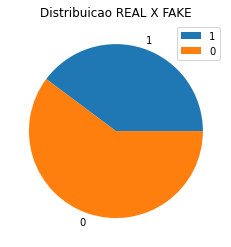

In [315]:
plt.pie([fake, true], labels=  df['label'].unique())
plt.legend()
plt.title('Distribuicao REAL X FAKE')

Text(0.5, 0, '0 - Real / 1 - Fake')

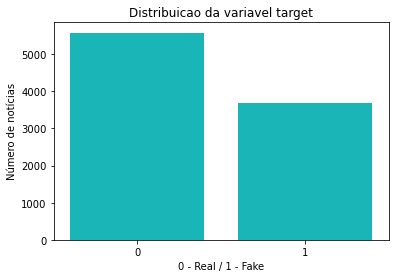

In [316]:
sns.barplot(x =df["label"].unique(), y = [fake, true], color='DarkTurquoise')
plt.title('Distribuicao da variavel target')
plt.ylabel('Número de notícias')
plt.xlabel('0 - Real / 1 - Fake')

# Trabalhando com dados veridicos

In [317]:
df_true = df[df['label']==0]
df_true.head(2)

,title,vinheta,data,dia,mes,ano,body,label,lide
6,"Nas redes sociais, Auxílio Brasil gera dúvidas...",País,12-11-2021,12,November,2021,Medida provisória assinada por Bolsonaro crio...,0,NaN
12,"Com ‘No epicentro’, Lupa está entre os três fi...",País,11-11-2021,11,November,2021,Ganhadores serão conhecidos em cerimônia virtu...,0,NaN


In [318]:
df_true['words_title'] = df_true['title'].apply(lambda x: len(x.split(' ')))
#df_true['count_words_title'].value_counts()
df_true['words_title'].value_counts(normalize=True).map("{:.1%}".format)

<ipython-input-318-b37318d135d5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



14    13.2%
13    12.1%
12    10.9%
15    10.6%
11     8.8%
16     7.8%
10     6.7%
17     6.4%
18     4.8%
9      4.5%
19     3.8%
20     2.3%
8      1.9%
21     1.6%
7      1.3%
22     1.2%
23     0.7%
24     0.4%
25     0.3%
6      0.2%
5      0.2%
4      0.1%
26     0.1%
3      0.1%
27     0.0%
28     0.0%
2      0.0%
29     0.0%
Name: words_title, dtype: object

In [319]:
title_true = px.histogram(df_true, x = df_true['words_title'], title='Distribuicao do número de palabras no título de notícias verdadeiras')
title_true

In [320]:
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('portuguese')

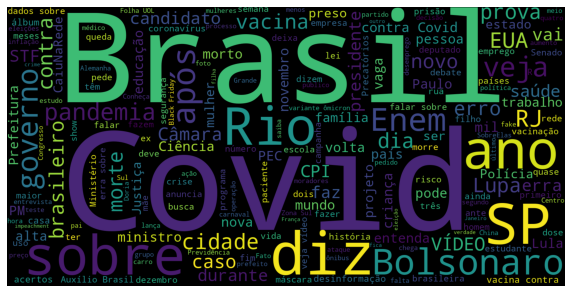

In [321]:
#Nuvem de palavras das noticias veridicas
titulo = " ".join(t for t in df_true['title'])
  
# gerar uma wordcloud
wordcloud = WordCloud(stopwords= stopwords,
                      background_color="black",
                      width=1600, height=800).generate(titulo)
    
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
    
plt.imshow(wordcloud);
wordcloud.to_file("../reports/figures/wordcloud_true.png")

# Trabalhando com notícias falsas

In [322]:
df_false = df[df['label']==1]
df_false.head(2)

,title,vinheta,data,dia,mes,ano,body,label,lide
0,É que Tite prestou homenagem em túmulo de Fi...,No Facebook,16-11-2021,16,November,2021,"Apesar da semelhança física, foto que circula ...",1,NaN
1,É que esposa do CEO da Pfizer morreu por com...,No WhatsApp,16-11-2021,16,November,2021,Myriam Bourla esteve em evento em 10 de novemb...,1,NaN


In [323]:
df_false['words_title'] = df_false['title'].apply(lambda x: len(x.split(' ')))
#df_true['count_words_title'].value_counts()
df_false['words_title'].value_counts(normalize=True).map("{:.1%}".format)

<ipython-input-323-4a011c1d6c88>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



14    15.9%
15    14.2%
13    11.7%
16    11.6%
12    10.6%
17     9.6%
18     5.9%
11     5.8%
19     4.0%
10     3.0%
20     2.5%
21     1.5%
9      1.1%
22     1.0%
23     0.6%
8      0.4%
24     0.3%
26     0.1%
7      0.1%
27     0.1%
25     0.1%
28     0.0%
30     0.0%
Name: words_title, dtype: object

# Numero de aparicoes de Fake News


<AxesSubplot:xlabel='vinheta'>

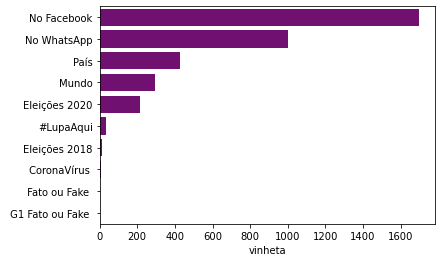

In [324]:
sns.barplot(x = df_false['vinheta'].value_counts(), y = df_false['vinheta'].unique(),color='purple')


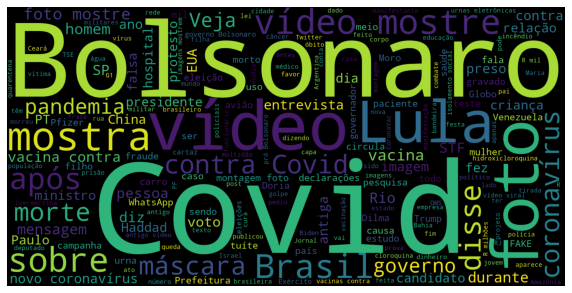

In [325]:
#Nuvem de palavras das noticias veridicas
titulo = " ".join(t for t in df_false['title'])

  
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(titulo)
    
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
    
plt.imshow(wordcloud);
wordcloud.to_file("../reports/figures/wordcloud_fake.png")

In [326]:
title_fake = px.histogram(df_false, x = df_false['words_title'], title='Distribuicao do número de palabras no título de notícias falsas')
title_fake

In [327]:
df = df.drop(['dia', 'mes', 'ano', 'data', 'vinheta'], axis=1)

In [328]:
df

,title,body,label,lide
0,É que Tite prestou homenagem em túmulo de Fi...,"Apesar da semelhança física, foto que circula ...",1,NaN
1,É que esposa do CEO da Pfizer morreu por com...,Myriam Bourla esteve em evento em 10 de novemb...,1,NaN
2,É que Lula foi vaiado em encontro de movimen...,Montagem utiliza áudio de vídeo gravado em 201...,1,NaN
3,É que Lewis Hamilton elogiou Bolsonaro para ...,Automobilista britânico já manifestou apoio ao...,1,NaN
4,É antigo áudio de queda de avião que está sen...,Registro que circula pelas redes sociais é de ...,1,NaN
...,...,...,...,...
1652,Áudio diz que enfermeira morreu após tomar chá...,NaN,0,None
1653,Áudio afirma que pedir nota fiscal em postos f...,NaN,0,None
1654,Putin estica braço em direção a pomba durante ...,NaN,0,None
1655,Final feliz,NaN,0,None


In [329]:
df.to_csv("../data/processed/dadosposanalise.csv", sep=',', encoding='utf-8', index=False)